In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv(r'C:\Users\natha\Documents\01-Projetos\titanic_ml\data\test.csv')
train = pd.read_csv(r'C:\Users\natha\Documents\01-Projetos\titanic_ml\data\train.csv')

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
# Empilhando as bases para tratamento de campos
titanic = pd.concat([train, test])
titanic.shape

(1309, 12)

In [5]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA - Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import numpy

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
# Verificando campos nulos
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

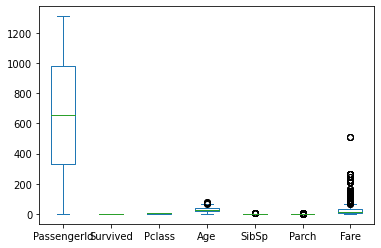

In [9]:
titanic.plot(kind='box')

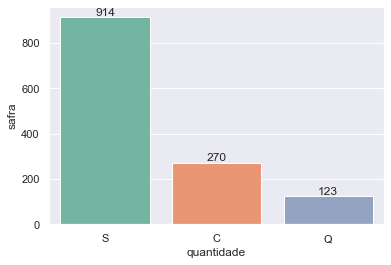

In [10]:
# Verificando os embarques, lembrando que há dois deles nulos

# Alterando o tamanho da figura do grafico
sns.set(rc={'figure.figsize':(6,4)})

# Analisando o número de abertura de chamados após agosto 
ax = sns.countplot(x = titanic.Embarked, palette='Set2');
ax.bar_label(ax.containers[0]);

# Preenchendo labels dos eixos
ax.set(xlabel='quantidade', ylabel='safra');

# Podermos perceber que as pessoas embarcaram mais no S, por conta disso vou preencher os faltantes com ela

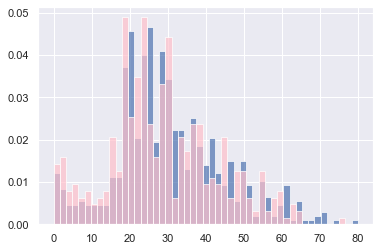

In [11]:
bins = numpy.linspace(0, titanic.Age.max())

# Histograma idade homem
plt.hist(
     titanic.Age[titanic.Sex == 'male'], 
     bins,
     density = True, 
     alpha = 0.7)

# Histograma idade mulher
plt.hist(
     titanic.Age[titanic.Sex == 'female'], 
     bins,
     density = True, 
     color ='pink',
     alpha = 0.7)

plt.show()
# Aqui percebemos que o padrao de idade de ambos os sexos é parecido (Avaliando os campos vazios de idade) Entre 20 e 30 temos uma concentracao 

<AxesSubplot:>

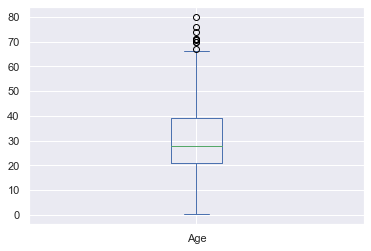

In [12]:
titanic.Age.plot(kind='box')

In [13]:
# Visualizando a relacao de sobreviventes por sexo e classe que estavam
grafico2 = px.parallel_categories(
    titanic[~(titanic.Survived.isnull())],
    dimensions=['Sex','Survived'],
    color='Pclass'
)
grafico2.show();

In [14]:
# Como verifiquei que as pessoas da 3 classe sobreviveram menos, tentando achar um padrao em relacao a cabine e a sobrevivencia
grafico2 = px.treemap(
    titanic[~(titanic.Survived.isnull()) & ~(titanic.Cabin.isnull())],
    path=['Survived', 'Cabin'],
    # color='Cabin'
)
grafico2.show();

In [15]:
titanic['letra_cabine'] = titanic.Cabin.str[:1]

# Separando a cabine pela primeira letra
titanic[['letra_cabine','Survived']].value_counts().reset_index().sort_values(by='letra_cabine')

# Podemos observar que nas letras B, D, E tivemos um indice maior de sobrevivencia

,letra_cabine,Survived,0
6,A,0.0,8
10,A,1.0,7
0,B,1.0,35
5,B,0.0,12
1,C,1.0,35
3,C,0.0,24
2,D,1.0,25
7,D,0.0,8
4,E,1.0,24
8,E,0.0,8


In [16]:
# Apesar de a cabine parecer uma boa variavel para utilizar possui muitos campos nulos, sendo assim 
# vou tentar achar uma relacao entre a cabine > classe > ticket
grafico2 = px.treemap(
    titanic[~(titanic.Survived.isnull()) & ~(titanic.Cabin.isnull())],
    path=['Pclass','Cabin', 'Ticket'],
    # color='Cabin'
)
grafico2.show();
# Aqui nao consegui encontrar um padrao para que atraves do ticket completar os casos nulos da Cabine

In [17]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,letra_cabine
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN


In [18]:
# Pegando a media de cada Fare por classe
df = titanic[['Pclass','Fare']].value_counts().reset_index().sort_values(by='Pclass').groupby(by='Pclass').mean().reset_index()
df

,Pclass,Fare,0
0,1,77.411762,3.018692
1,2,21.951127,5.770833
2,3,13.034335,5.323308


# Tratando missing 

In [19]:
titanic.isnull().sum()

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
letra_cabine    1014
dtype: int64

In [20]:
# Preenchendo o campo de embarque pelo mais frequente da base
titanic.loc[titanic.Embarked.isnull(), 'Embarked'] = 'S'

In [21]:
titanic[titanic.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,letra_cabine
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN


In [22]:
# Preenchendo o campo de Fare pela media da 3 classe
titanic.Fare.fillna(13.03, inplace=True)

In [23]:
titanic.Age.mean().round()

30.0

In [24]:
# Preenchendo a idade pela meadian
titanic.loc[titanic.Age.isnull(), 'Age'] = titanic.Age.mean().round()

In [25]:
titanic.isnull().sum()

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin           1014
Embarked           0
letra_cabine    1014
dtype: int64

# Removendo campos

In [26]:
# Aqui vou remover os campos que nao vou utilizar, pois na minha visao sao campos muito unicos (nome, Id passegeiro e Ticket)
titanic.drop(columns=['Name', 'Ticket', 'Cabin', 'letra_cabine'], inplace=True)

# Tratando campos que sobraram

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [28]:
def transform_label_encoder(data, columns):

    label_encoder = LabelEncoder()

    for column in columns:
        label_encoder.fit(data[column])
        data[column] = label_encoder.transform(data[column])
        # print(label_encoder.classes_)
    
    return data

In [29]:
# Retirando campos escritos com label encoder 
titanic = transform_label_encoder(titanic, ['Pclass','Sex','Embarked'])

In [30]:
# Para a idade vou agrupar de 10 em 10 anos
titanic.loc[ titanic['Age'] <= 10, 'Age'] = 0
titanic.loc[(titanic['Age'] > 10) & (titanic['Age'] <= 20), 'Age'] = 1
titanic.loc[(titanic['Age'] > 20) & (titanic['Age'] <= 30), 'Age'] = 2
titanic.loc[(titanic['Age'] > 30) & (titanic['Age'] <= 40), 'Age'] = 3
titanic.loc[(titanic['Age'] > 40) & (titanic['Age'] <= 50), 'Age'] = 4
titanic.loc[(titanic['Age'] > 50) & (titanic['Age'] <= 60), 'Age'] = 5
titanic.loc[titanic['Age'] > 60, 'Age'] = 6

titanic.Age = titanic.Age.astype(int)
titanic.Age.value_counts().reset_index()

,index,Age
0,2,624
1,3,210
2,1,162
3,4,132
4,0,86
5,5,62
6,6,33


In [31]:
# Arredondando Fare
titanic.Fare = titanic.Fare.round().astype(int)

In [32]:
titanic
# Decidi nao realizar o feature scale para testar sem antes de mexer neste ponto
titanic.to_csv(r'C:\Users\natha\Documents\01-Projetos\titanic_ml\base_sem_scale.csv', index=False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,2,1,2,1,0,7,2
1,2,1.0,0,0,3,1,0,71,0
2,3,1.0,2,0,2,0,0,8,2
3,4,1.0,0,0,3,1,0,53,2
4,5,0.0,2,1,3,0,0,8,2
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,2,1,2,0,0,8,2
414,1306,NaN,0,0,3,0,0,109,0
415,1307,NaN,2,1,3,0,0,7,2
416,1308,NaN,2,1,2,0,0,8,2


# Separando novamente as bases

In [33]:
from sklearn.model_selection import train_test_split

train = titanic[~(titanic.Survived.isnull())]
test = titanic[(titanic.Survived.isnull())]

train.shape, test.shape

((891, 9), (418, 9))

In [34]:
train.Survived = train.Survived.astype(int)
train.drop(columns=['PassengerId'], inplace=True)

In [35]:
# Separando o df de treino em dois para poder testar os modelos desta forma
train_real, train_test = train_test_split(train, test_size=0.2)

In [36]:
# Separando o target do resto das variaveis
train_x = train_real.drop(columns=['Survived'])
train_y = train_real.Survived

In [37]:
# Separando o target do resto das variaveis
train_test_x = train_test.drop(columns=['Survived'])
train_test_y = train_test.Survived

In [54]:
# Testando com standart scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
train_test_x = scaler.fit_transform(train_test_x)

# Realizando modelagem

In [55]:
# Importando funcoes de avalicao
from sklearn.metrics import accuracy_score, classification_report

## Regrassao Logistica

0.7374301675977654
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       113
           1       0.63      0.68      0.66        66

    accuracy                           0.74       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.74      0.74      0.74       179



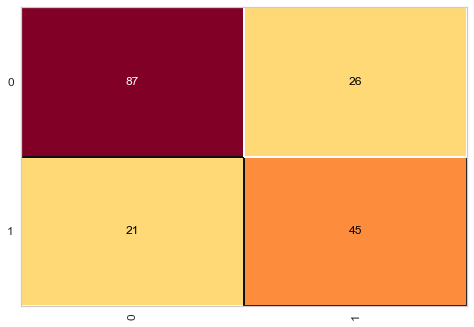

In [56]:
from sklearn.linear_model import LogisticRegression

# Treinando
logistic_regression = LogisticRegression(random_state=1)
logistic_regression.fit(train_x, train_y)

# Testando
previsoes = logistic_regression.predict(train_test_x)
print(accuracy_score(train_test_y, previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_regression)
cm.fit(train_x, train_y)
cm.score(train_test_x, train_test_y);
# 0 morreram
# 1 sobreviveram

print(classification_report(train_test_y,previsoes))

## Decision Tree

0.6424581005586593
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       113
           1       0.51      0.64      0.57        66

    accuracy                           0.64       179
   macro avg       0.63      0.64      0.63       179
weighted avg       0.66      0.64      0.65       179



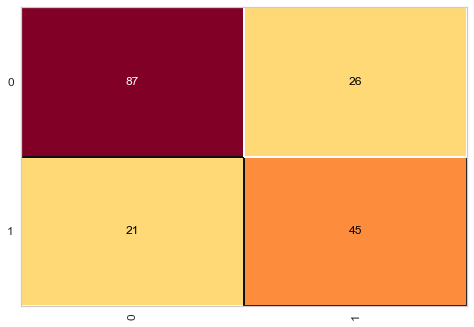

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Treinando
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree.fit(train_x, train_y)

# Testando
previsoes = decision_tree.predict(train_test_x)
print(accuracy_score(train_test_y, previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_regression)
cm.fit(train_x, train_y)
cm.score(train_test_x, train_test_y);
# 0 morreram
# 1 sobreviveram

print(classification_report(train_test_y,previsoes))

# Random Forest

0.7262569832402235
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       113
           1       0.62      0.68      0.65        66

    accuracy                           0.73       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.73      0.73      0.73       179



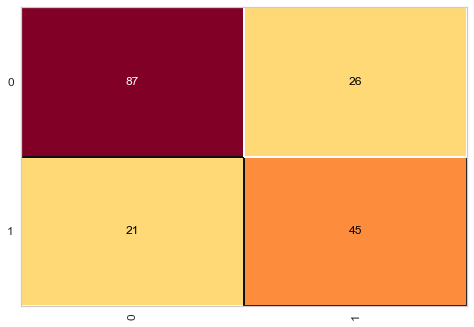

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Treinando
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest.fit(train_x, train_y)

# Testando
previsoes = random_forest.predict(train_test_x)
print(accuracy_score(train_test_y, previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_regression)
cm.fit(train_x, train_y)
cm.score(train_test_x, train_test_y);
# 0 morreram
# 1 sobreviveram

print(classification_report(train_test_y,previsoes))

# KNN

0.8100558659217877
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       113
           1       0.75      0.73      0.74        66

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



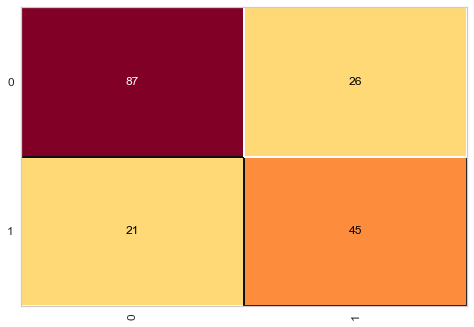

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Treinando
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(train_x, train_y)

# Testando
previsoes = knn.predict(train_test_x)
print(accuracy_score(train_test_y, previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_regression)
cm.fit(train_x, train_y)
cm.score(train_test_x, train_test_y);
# 0 morreram
# 1 sobreviveram

print(classification_report(train_test_y,previsoes))

# Navie Bayes

0.7486033519553073
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       113
           1       0.64      0.73      0.68        66

    accuracy                           0.75       179
   macro avg       0.73      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179



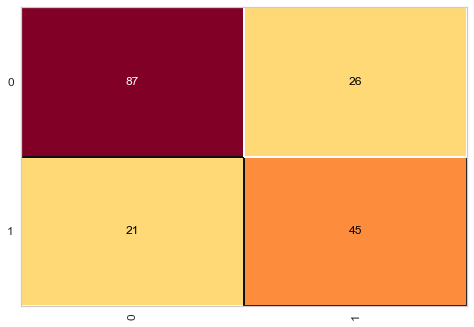

In [60]:
from sklearn.naive_bayes import GaussianNB

# Treinando
naive_bayes = GaussianNB()
naive_bayes.fit(train_x, train_y)

# Testando
previsoes = naive_bayes.predict(train_test_x)
print(accuracy_score(train_test_y, previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_regression)
cm.fit(train_x, train_y)
cm.score(train_test_x, train_test_y);
# 0 morreram
# 1 sobreviveram

print(classification_report(train_test_y,previsoes))

# SVM

0.7877094972067039
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.73      0.68      0.70        66

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



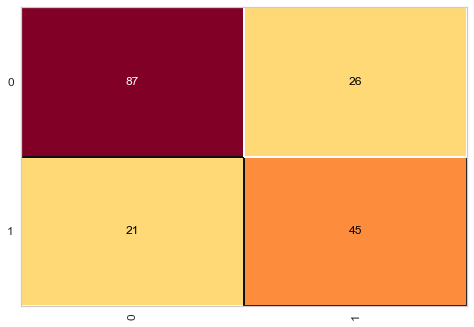

In [61]:
from sklearn.svm import SVC

# Treinando
svm =  SVC(C=1,kernel='linear',random_state=1)
svm.fit(train_x, train_y)

# Testando
previsoes = svm.predict(train_test_x)
print(accuracy_score(train_test_y, previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_regression)
cm.fit(train_x, train_y)
cm.score(train_test_x, train_test_y);
# 0 morreram
# 1 sobreviveram

print(classification_report(train_test_y,previsoes))

# Realizando o treinamento com o dataset final

In [45]:
## Cenario sem a Standard Scale
    # Como o melhor modelo foi o random forest vou utiliza-lo no final
    # Acerto de 84%

## Cenario com a Standard Scale (piora geral, tirando KNN)
    # Como o melhor modelo foi o random forest vou utiliza-lo no final
    # Acerto de 84%

test_model = test.drop(columns=['PassengerId', 'Survived'])
test.head(2), test_model.head(2)

In [62]:
test_model = scaler.fit_transform(test_model)
# Testando
previsoes = knn.predict(test_model)

In [48]:
# Testando
# previsoes = random_forest.predict(test_model)

In [63]:
output = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': previsoes})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
# output.to_csv(r'C:\Users\natha\Documents\01-Projetos\titanic_ml\predictions\logi_regres_25-03-2023.csv', index=False) # 0.75837 score
output.to_csv(r'C:\Users\natha\Documents\01-Projetos\titanic_ml\predictions\knn_25-03-2023.csv', index=False) # 0.76794 score

Conclusao:
Apesar de ter tido uma piora com o Standard Scale para a maioria dos modelos, o KNN se saiu melhor no teste final que os outros. Acredito que para melhorar o modelo seria necessario tentar criar alguma variavel nova ou aproveitar melhor as que eu dropei antes do modelo.